<a href="https://colab.research.google.com/github/danielsaggau/IR_LDC/blob/main/plots/Plot_swiss_judgement_by_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
dataset_de = load_dataset("swiss_judgment_prediction", language= "de")
dataset_it = load_dataset("swiss_judgment_prediction", language= "it")
dataset_fr = load_dataset("swiss_judgment_prediction", language= "fr")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
italy_train = pd.DataFrame(dataset_it['train'])
de_train = pd.DataFrame(dataset_de['train'])
fr_train = pd.DataFrame(dataset_fr['train'])
it_train = pd.DataFrame(dataset_it['train'])

In [ ]:
#de_test['type'] = "test"
text = de_train['text']
de_train['length'] = text.str.len()
#text_test = de_test['text']
#de_test['length'] = text_test.str.len()
#text_validation = de_validation['text']
#de_validation['length'] = text_validation.str.len()

In [ ]:
fr_text = fr_train['text']
fr_train['length'] = fr_text.str.len()
it_text = it_train['text']
it_train['length'] = it_text.str.len()

In [ ]:
import numpy as np
de_train['log_length'] = np.log10(de_train['length'])
fr_train['log_length'] = np.log10(fr_train['length'])
it_train['log_length'] = np.log10(it_train['length'])

In [ ]:
data = pd.concat([de_train, it_train])
data = pd.concat([data, fr_train])

In [ ]:
x= pd.merge(de_train, it_train,how="left")
y = pd.merge(x, fr_train, how ="left")
y

,id,year,text,label,language,region,canton,legal area,source_language,length,log_length
0,2,2000,A.- Der 1955 geborene V._ war seit 1. Septembe...,0,de,Zürich,zh,insurance law,n/a,3961,3.597805
1,3,2000,"Ansprüche nach OHG, hat sich ergeben: A.- X._ ...",1,de,Central Switzerland,lu,public law,n/a,3348,3.524785
2,4,2000,Art. 4 aBV (Strafverfahren wegen falschen Zeug...,0,de,Northwestern Switzerland,ag,public law,n/a,2133,3.328991
3,5,2000,"Art. 5 Ziff. 1 EMRK (Haftentlassung), hat sich...",1,de,n/a,n/a,public law,n/a,2542,3.405176
4,6,2000,"Mietvertrag, hat sich ergeben: A.- Die CT Cond...",0,de,n/a,n/a,civil law,n/a,1680,3.225309
...,...,...,...,...,...,...,...,...,...,...,...
35453,48747,2014,Sachverhalt: A. Mit Einspracheentscheid vom 3....,1,de,n/a,n/a,social law,n/a,1545,3.188928
35454,48751,2014,"Sachverhalt: A. X._ wird vorgeworfen, sich am ...",0,de,Zürich,zh,penal law,n/a,1059,3.024896
35455,48752,2014,Sachverhalt: A. X._ stellte in seinem Wohnhaus...,0,de,Eastern Switzerland,gr,penal law,n/a,1140,3.056905
35456,48753,2014,Sachverhalt: A. In den Monaten Dezember 2008 b...,0,de,Federation,ch,social law,n/a,1644,3.215902


In [ ]:
y[1:10]

,id,year,text,label,language,region,canton,legal area,source_language,length,log_length
1,3,2000,"Ansprüche nach OHG, hat sich ergeben: A.- X._ ...",1,de,Central Switzerland,lu,public law,n/a,3348,3.524785
2,4,2000,Art. 4 aBV (Strafverfahren wegen falschen Zeug...,0,de,Northwestern Switzerland,ag,public law,n/a,2133,3.328991
3,5,2000,"Art. 5 Ziff. 1 EMRK (Haftentlassung), hat sich...",1,de,n/a,n/a,public law,n/a,2542,3.405176
4,6,2000,"Mietvertrag, hat sich ergeben: A.- Die CT Cond...",0,de,n/a,n/a,civil law,n/a,1680,3.225309
5,8,2000,A.- Der 1940 geborene H._ liess sich Mitte 198...,1,de,n/a,n/a,insurance law,n/a,2406,3.381296
6,9,2000,"unentgeltliche Prozessführung), hat sich ergeb...",0,de,Eastern Switzerland,sh,civil law,n/a,749,2.874482
7,10,2000,A.- Die 1954 geborene S._ nahm an einem Beschä...,1,de,Eastern Switzerland,tg,insurance law,n/a,3607,3.557146
8,11,2000,hat sich ergeben: A.- Am 29. Oktober 1993 schl...,0,de,n/a,n/a,civil law,n/a,3497,3.543696
9,12,2000,A.- Am 20. Januar 1995 meldete sich die 1964 g...,1,de,Espace Mittelland,be,insurance law,n/a,1605,3.205475


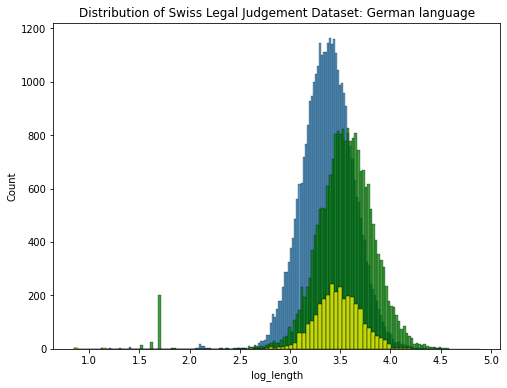

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "log_length",data = de_train).set(title='Distribution of Swiss Legal Judgement Dataset: German language')
sns.histplot(x= "log_length",data = fr_train, color = "green")
sns.histplot(x= "log_length",data = it_train, color = "yellow")
plt.savefig("swiss_de_histplot.jpg")

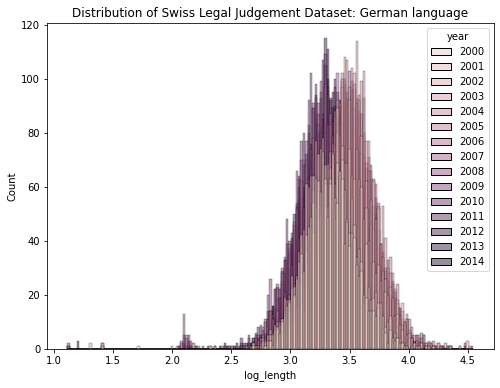

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "log_length", data = de_train, hue = "year").set(title='Distribution of Swiss Legal Judgement Dataset: German language')
plt.savefig("swiss_de_histplot.jpg")

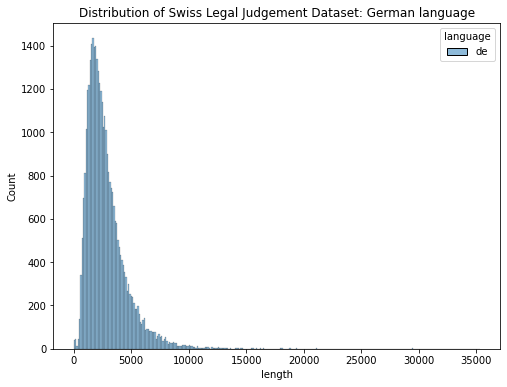

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "length",data = y, hue = "language").set(title='Distribution of Swiss Legal Judgement Dataset: German language')
plt.savefig("swiss_de_histplot.jpg")

In [ ]:
de = data[data.index.duplicated()]
de.head()

,id,year,text,label,language,region,canton,legal area,source_language,length,log_length
0,0,2000,"Fatti : A.- P._, cittadino italiano, nato nel ...",0,it,n/a,n/a,insurance law,n/a,1983,3.297323
1,1,2000,Fatti : A.- Nell'ambito di un controllo del co...,1,it,n/a,n/a,insurance law,n/a,2327,3.366796
2,2,2000,Fatti : A.- La Cassa disoccupazione del Sindac...,0,it,n/a,n/a,insurance law,n/a,1944,3.288696
3,3,2000,"Fatti : A.- C._, consulente fiduciario a M._, ...",0,it,n/a,n/a,insurance law,n/a,3023,3.480438
4,4,2000,Fatti : A.- La E._ SA è stata iscritta a regis...,1,it,n/a,n/a,insurance law,n/a,2595,3.414137


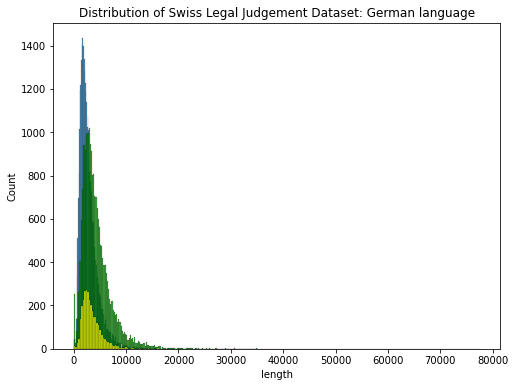

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x= "length",data = de_train).set(title='Distribution of Swiss Legal Judgement Dataset: German language')
sns.histplot(x= "length", data = fr_train, color = "green")
sns.histplot(x= "length" ,data = it_train, color = "yellow")
plt.savefig("swiss_de_histplot.jpg")